<a href="https://colab.research.google.com/github/saraygarciag/Tareas_Saray_Garcia/blob/main/GarciaSaray_Parcial1-CORRECCI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CORRECCIÓN PARCIAL PRÁCTICO 1

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
import statistics as st
from vega_datasets import data


In [2]:
df = pd.read_csv('student-mat.csv', 
                 sep = ';',
                 index_col=False,
                 error_bad_lines=False,
                 )
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## ¿Existen valores vacíos o nulos para alguna de las variables del dataset?

In [ ]:
pd.isnull(df)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GP,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
GP,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
GP,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
GP,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
GP,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MS,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MS,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MS,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
df.isnull().values.any()

False

In [5]:
df.isnull().sum() #No hay nulos's

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
df.isna().values.any() #No hay na's

False

## 1.	¿Cuántos estudiantes viven en zona urbana o rural? ¿Cuántos de los estudiantes rurales son mujeres y cuántas son hombres?

In [ ]:
rural = sum(df['address']=="R")
rural

88

R:// 88 estudiantes viven en zona rural.

In [ ]:
urb = sum(df['address']=="U")
urb

307

R:// 307 estudiantes viven en zona urbana.

In [ ]:
mujeresrural = sum((df['address']=="R") & (df['sex']=="F" ))
mujeresrural

44

R:// 44 estudiantes que viven en zona rural son mujeres.

In [ ]:
homrural = sum((df['address']=="R") & (df['sex']=="M" ))
homrural

44

R:// 44 estudiantes que viven en zona rural son hombres.

## 2.	¿Cuántos estudiantes que viven en la zona rural se demoran en transportarse para llegar de la casa al colegio más de una hora? ¿Cuántos de ellos son mujeres y cuántos son hombres?

In [ ]:
unahora = sum((df['address']=="R") & (df['traveltime']== 4 ))
unahora

5

R:// 5 estudiantes que viven en zona rural se demoran más de una hora.

In [ ]:
unahora = sum((df['address']=="R") & (df['traveltime']== 4 ) & (df['sex']=="M" ))
unahora

4

R:// De los estudiantes que viven en zona rural y se demoran más de una hora 4 son hombres.

In [ ]:
unahora2 = sum((df['address']=="R") & (df['traveltime']== 4 ) & (df['sex']=="F" ))
unahora2

1

R:// De los estudiantes que viven en zona rural y se demoran más de una hora 1 es mujer.

## 3.	¿Cuántos estudiantes que viven en la zona rural tienen más de 5 fallas? ¿Cuántos de ellos son mujeres y cuántos son hombres?

In [9]:
fallas = sum((df['address']=="R") & (df['failures']== 4 ))
print(fallas)
fallasmujer = sum((df['address']=="R") & (df['failures']== 4 ) & (df['sex']=="F" ))
print(fallasmujer)
fallashombre = sum((df['address']=="R") & (df['failures']== 4 ) & (df['sex']=="M" ))
print(fallashombre)

0
0
0


R:// Hay 0 estudiantes que viven en la zona rural y tienen más de 5 fallas, por lo tanto, 0 mujeres y 0 hombres.

## 4.	¿Cuántos estudiantes tienen madres y padres con un grado de escolaridad por encima de la educación secundaria?

In [ ]:
#4 
escolaridad = sum((df['Fedu']==4) & (df['Medu']== 4 ))
escolaridad

70

R:// 70 estudiantes tienen madres y padres con un grado de escolaridad por encima de la educación secundaria.

## 5.	Se quiere ver la media de las notas de matemáticas de los estudiantes del colegio Gabriel Pereira vs Mousinho da Silveira, teniendo en cuenta si los estudiantes tienen o no internet en sus casas. Realice una visualización de datos teniendo en cuenta estas 3 variables.

In [34]:
df['Media de la Calificación'] = (df['G1'] + df['G2'] + df['G3'])/3

df2 = df[['school','internet','Media de la Calificación']]

tabla = df2.pivot_table('Media de la Calificación',['school','internet'], aggfunc={'Media de la Calificación':np.mean})
print(tabla)

                 Media de la Calificación
school internet                          
GP     no                       10.038462
       yes                      10.859708
MS     no                        9.071429
       yes                      10.750000


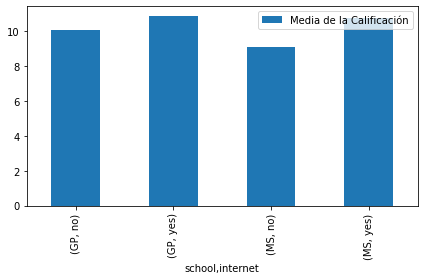

In [36]:
tabla.plot(kind='bar')
plt.tight_layout() 

## 6.	Cree una nueva variable en la tabla que corresponda a la calificación total para cada uno de los estudiantes y responda ¿Cuál es la media, mediana, mínima y máxima calificación total?

In [20]:
#Nueva variable:
df['califtotal'] = (df['G1'] + df['G2'] + df['G3'])/3

media = st.mean(df['califtotal'])
print("La media de la calificacion total es: ", media)

La media de la calificacion total es:  10.679324894514767


In [23]:
mediana = np.percentile((df['califtotal']), 50) 
print("La mediana de la calificacion total es: ", mediana) 

La mediana de la calificacion total es:  10.666666666666666


In [21]:
min = np.min(df['califtotal'])
print("La minima calificacion total es: ", min)

La minima calificacion total es:  1.3333333333333333


In [22]:
max = np.max(df['califtotal'])
print("La máxima calificacion total es: ", max)

La máxima calificacion total es:  19.333333333333332


## 7.	Teniendo en cuenta que el dataset contiene tanto variables numéricas como variables categóricas responda ¿Qué tipo de análisis realizaría: Regresión o clasificación? Si fuera regresión o clasificación: ¿Qué variable usaría para predecir o clasificar? ¿Cuáles variables tiene la hipótesis que podrían servir para pronosticar o clasificar?

Yo realizaria una regresión, podria predecir cuánto sacará un alumno en su nota de matematicas de acuerdo a sus caracteristicas propias como el contexto en el que vive, sea una propiedad rural o urbana, el nivel de educacion de sus padres, el tiempo de ocio que tiene. La hipotesis podria ser pronosticar si es cierto que alguien saca menos nota en matematicas porque vive en zona rural o urbana.





